<a href="https://colab.research.google.com/github/SravaniRavinuthala/House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
import pylab

In [ ]:
df = pd.read_csv('house_prices.csv')

In [ ]:
df.shape
df.iloc[:5,1:10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0


In [ ]:
df.iloc[:5,10:]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
distinct_counts = []

# Loop through columns
for column in df.columns:
    distinct_count = df[column].nunique()  # Use nunique() to count distinct values
    first_5_unique_values = df[column].unique()[:5]
    last_5_unique_values = df[column].unique()[-5:]
    distinct_counts.append({
        'Column': column,
        'Distinct_Values_Count': distinct_count,
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

# Create a DataFrame from the list of distinct value counts
distinct_counts_df = pd.DataFrame(distinct_counts)

# Display the DataFrame with distinct value counts
distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False,ignore_index=True)

,Column,Distinct_Values_Count,First_5_Unique_Values,Last_5_Unique_Values
0,id,21436,"[7129300520, 6414100192, 5631500400, 248720087...","[263000018, 6600060120, 1523300141, 291310100,..."
1,sqft_lot,9782,"[5650, 7242, 10000, 5000, 8080]","[5536, 1126, 5813, 2388, 1076]"
2,sqft_lot15,8689,"[5650, 7639, 8062, 5000, 7503]","[6814, 11303, 5731, 1509, 2007]"
3,lat,5034,"[47.5112, 47.721, 47.7379, 47.5208, 47.6168]","[47.4304, 47.2815, 47.3906, 47.3339, 47.6502]"
4,price,3625,"[221900.0, 538000.0, 180000.0, 604000.0, 51000...","[3570000.0, 594866.0, 541800.0, 610685.0, 4021..."
5,sqft_living,1038,"[1180, 2570, 770, 1960, 1680]","[1333, 2198, 3087, 3118, 1425]"
6,sqft_above,946,"[1180, 2170, 770, 1050, 1680]","[1333, 2198, 3087, 3118, 1425]"
7,sqft_living15,777,"[1340, 1690, 2720, 1360, 1800]","[2604, 1268, 2198, 3038, 2927]"
8,long,752,"[-122.257, -122.319, -122.233, -122.393, -122....","[-121.405, -122.486, -121.795, -121.734, -121...."
9,date,372,"[20141013T000000, 20141209T000000, 20150225T00...","[20141011T000000, 20150201T000000, 20141130T00..."


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop(['id','date'],axis=1,inplace=True)

In [ ]:
numeric_columns = ['sqft_lot','sqft_lot15','sqft_living','sqft_living15','sqft_above','sqft_basement','lat','long','yr_built','yr_renovated']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

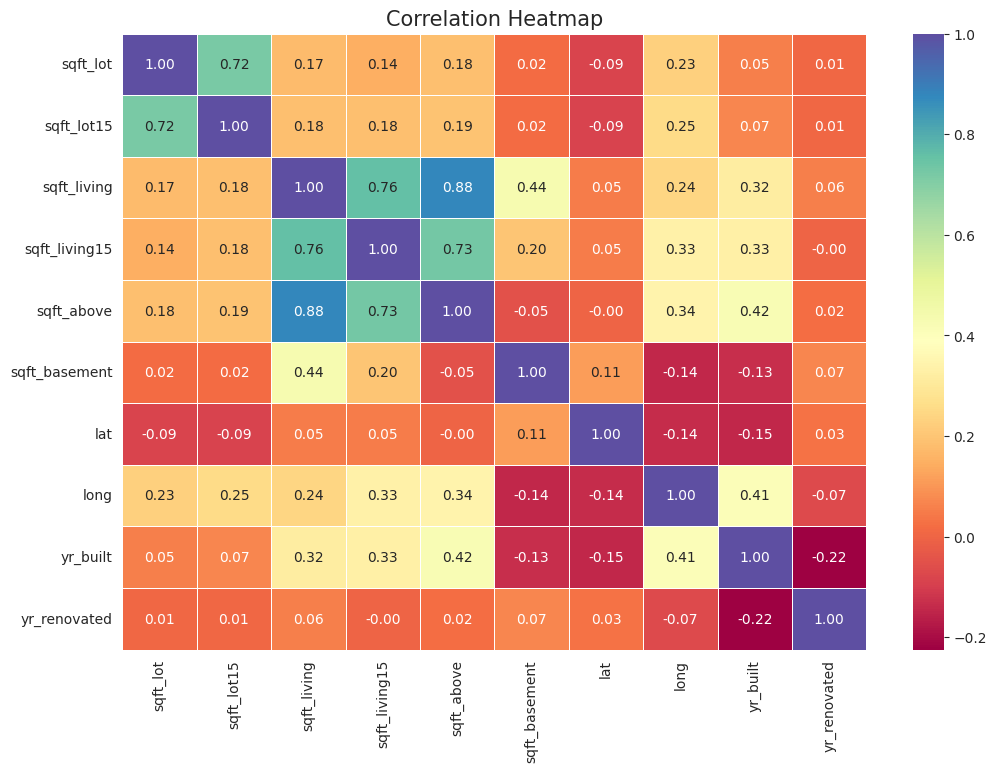

In [ ]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

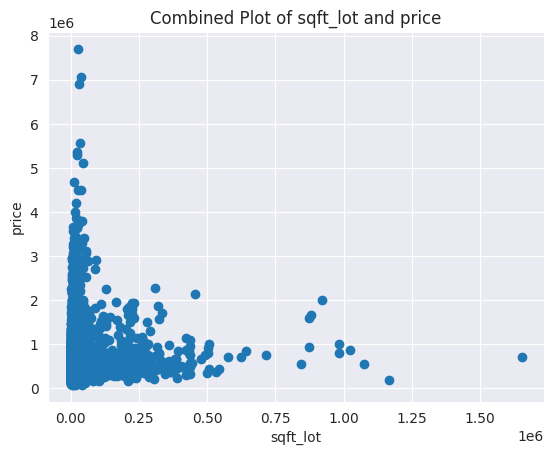

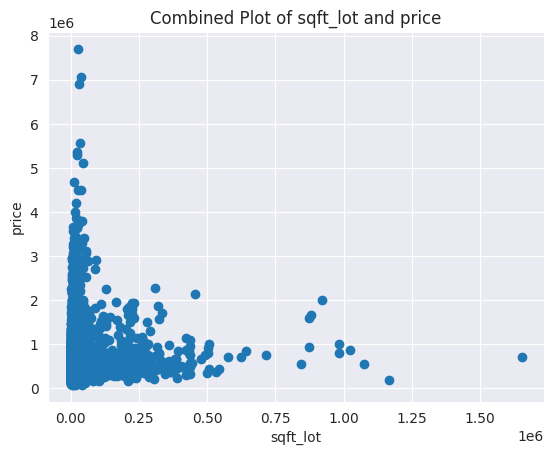

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def num_combined_plot(df, col1, col2):
    """
    Creates a combined plot of two numerical columns in a pandas DataFrame.

    Args:
        df: A pandas DataFrame.
        col1: The name of the first numerical column.
        col2: The name of the second numerical column.
    """

    # Create a scatter plot of the two columns.
    plt.scatter(df[col1], df[col2])

    # Add labels to the axes.
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Add a title to the plot.
    plt.title('Combined Plot of {} and {}'.format(col1, col2))

    # Show the plot.
    plt.show()

# Load the DataFrame.
df = pd.read_csv('house_prices.csv')

# Create a combined plot of the sqft_lot and price columns.
num_combined_plot(df, 'sqft_lot', 'price')

num_combined_plot(df,'sqft_lot','price')

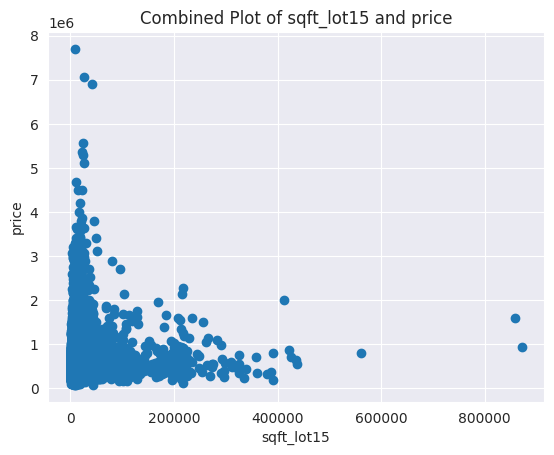

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def num_combined_plot(df, col1, col2):
    """
    Creates a combined plot of two numerical columns in a pandas DataFrame.

    Args:
        df: A pandas DataFrame.
        col1: The name of the first numerical column.
        col2: The name of the second numerical column.
    """

    # Create a scatter plot of the two columns.
    plt.scatter(df[col1], df[col2])

    # Add labels to the axes.
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Add a title to the plot.
    plt.title('Combined Plot of {} and {}'.format(col1, col2))

    # Show the plot.
    plt.show()

# Load the DataFrame.
df = pd.read_csv('house_prices.csv')

# Create a combined plot of the sqft_lot and price columns.
num_combined_plot(df, 'sqft_lot15', 'price')


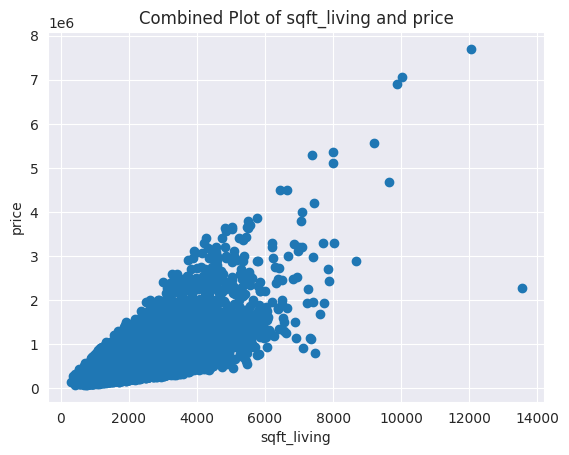

In [ ]:


def num_combined_plot(df, col1, col2):
    """
    Creates a combined plot of two numerical columns in a pandas DataFrame.

    Args:
        df: A pandas DataFrame.
        col1: The name of the first numerical column.
        col2: The name of the second numerical column.
    """

    # Create a scatter plot of the two columns.
    plt.scatter(df[col1], df[col2])

    # Add labels to the axes.
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Add a title to the plot.
    plt.title('Combined Plot of {} and {}'.format(col1, col2))

    # Show the plot.
    plt.show()

# Load the DataFrame.
df = pd.read_csv('house_prices.csv')

# Create a combined plot of the sqft_lot and price columns.
num_combined_plot(df, 'sqft_living', 'price')


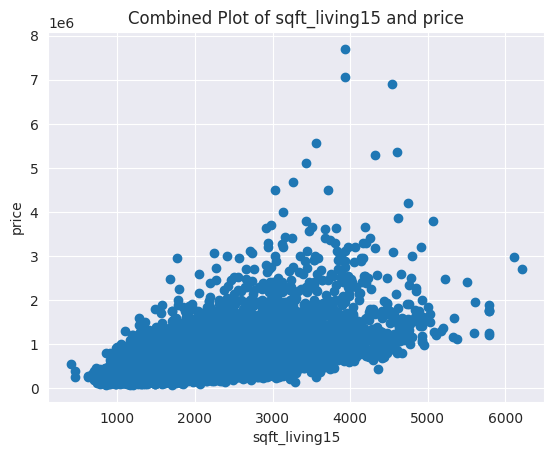

In [ ]:


def num_combined_plot(df, col1, col2):
    """
    Creates a combined plot of two numerical columns in a pandas DataFrame.

    Args:
        df: A pandas DataFrame.
        col1: The name of the first numerical column.
        col2: The name of the second numerical column.
    """

    # Create a scatter plot of the two columns.
    plt.scatter(df[col1], df[col2])

    # Add labels to the axes.
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Add a title to the plot.
    plt.title('Combined Plot of {} and {}'.format(col1, col2))

    # Show the plot.
    plt.show()

# Load the DataFrame.
df = pd.read_csv('house_prices.csv')

# Create a combined plot of the sqft_lot and price columns.
num_combined_plot(df, 'sqft_living15', 'price')


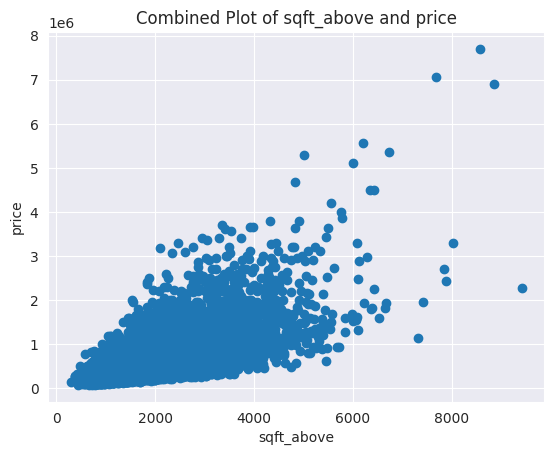

In [ ]:

num_combined_plot(df, 'sqft_above', 'price')


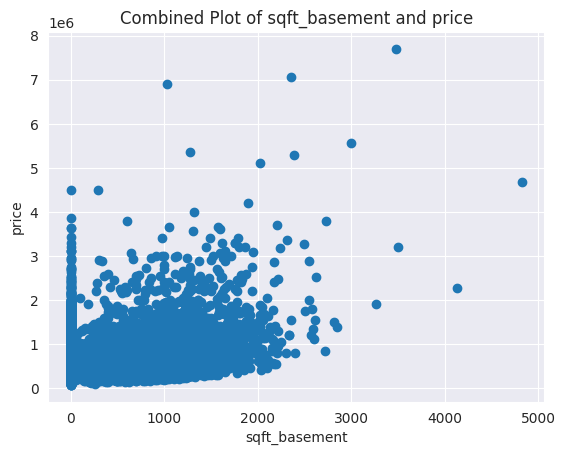

In [ ]:
num_combined_plot(df,'sqft_basement','price')

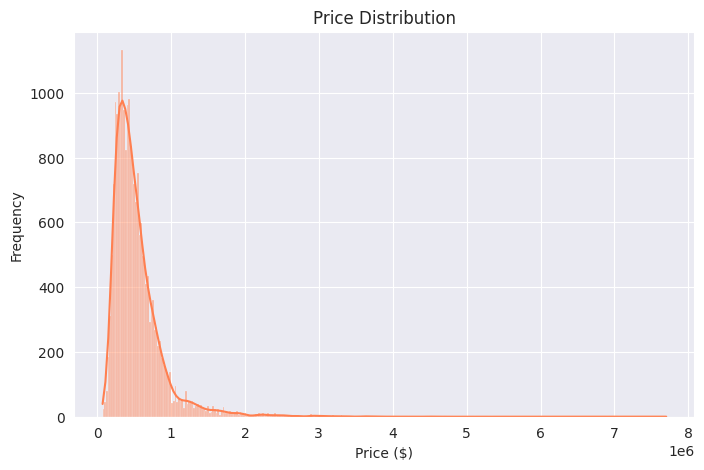

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price', kde=True, color='coral')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

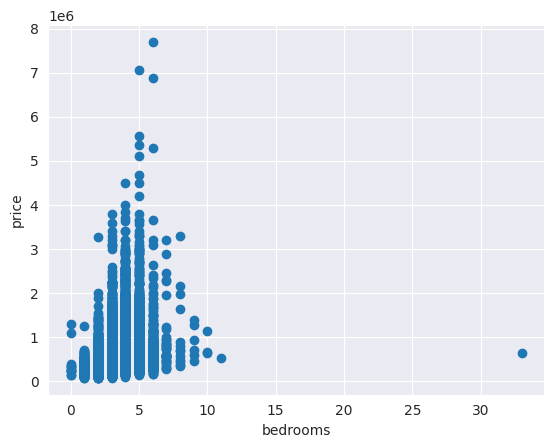

In [ ]:


def create_subplot_grid(df, x_col, y_col):
  """Creates a subplot grid for the given DataFrame and columns.

  Args:
    df: A Pandas DataFrame.
    x_col: The name of the column to use for the x-axis.
    y_col: The name of the column to use for the y-axis.

  Returns:
    A matplotlib.pyplot.subplots.AxesSubplot object.
  """

  fig, ax = plt.subplots()
  ax.scatter(df[x_col], df[y_col])
  ax.set_xlabel(x_col)
  ax.set_ylabel(y_col)
  return ax

# Create a subplot grid for the bedrooms and price columns
ax = create_subplot_grid(df, 'bedrooms', 'price')

# Show the plot
plt.show()


<Axes: xlabel='bathrooms', ylabel='price'>

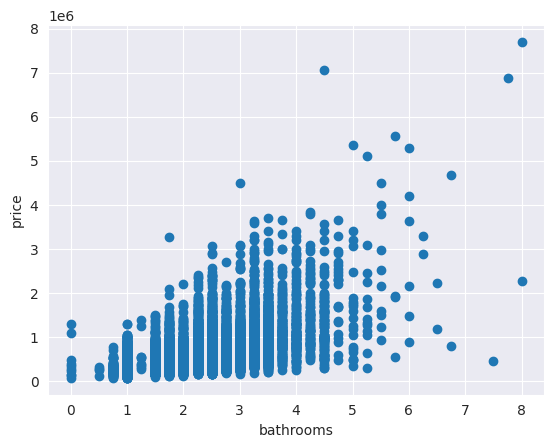

In [ ]:
create_subplot_grid(df, 'bathrooms', 'price')

<Axes: xlabel='floors', ylabel='price'>

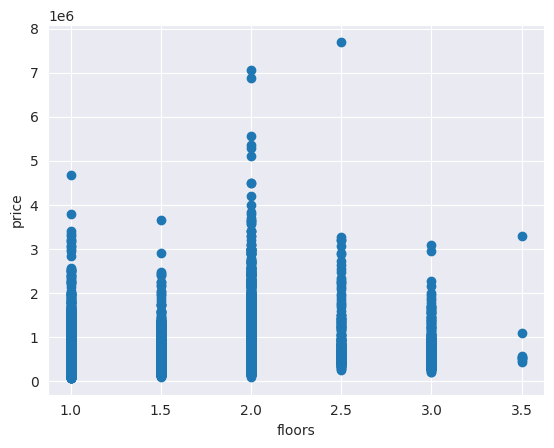

In [ ]:
create_subplot_grid(df, 'floors', 'price')


<Axes: xlabel='waterfront', ylabel='price'>

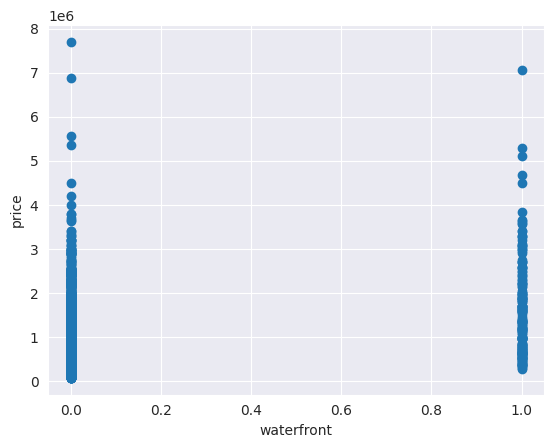

In [ ]:
create_subplot_grid(df, 'waterfront', 'price')


<Axes: xlabel='view', ylabel='price'>

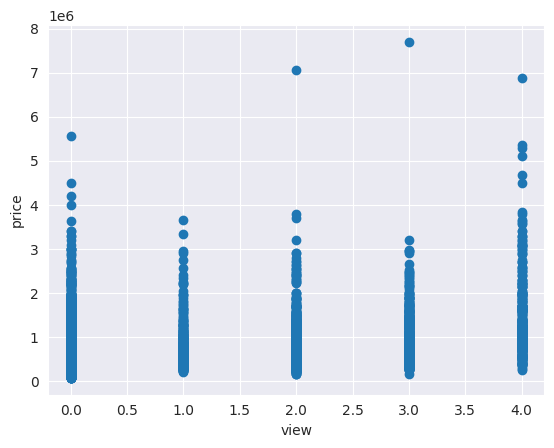

In [ ]:
create_subplot_grid(df, 'view', 'price')


<Axes: xlabel='condition', ylabel='price'>

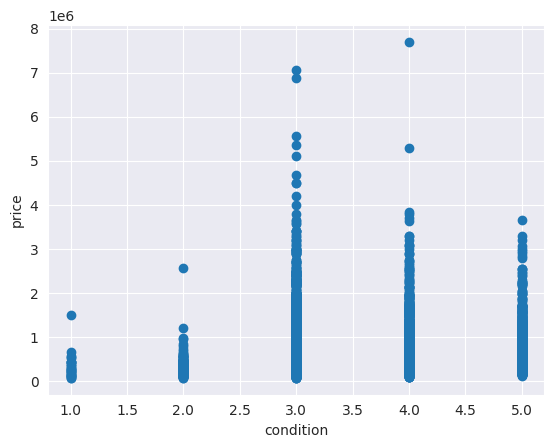

In [ ]:
create_subplot_grid(df, 'condition', 'price')


<Axes: xlabel='grade', ylabel='price'>

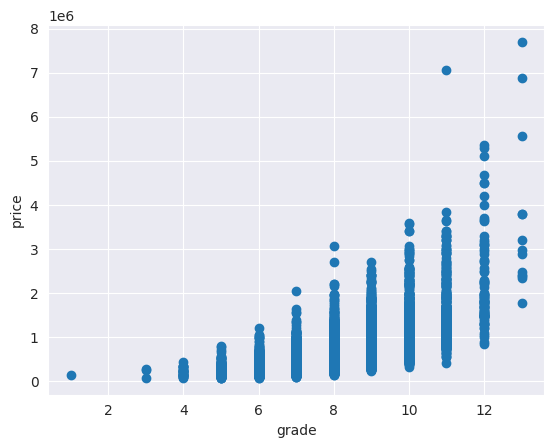

In [ ]:
create_subplot_grid(df, 'grade', 'price')


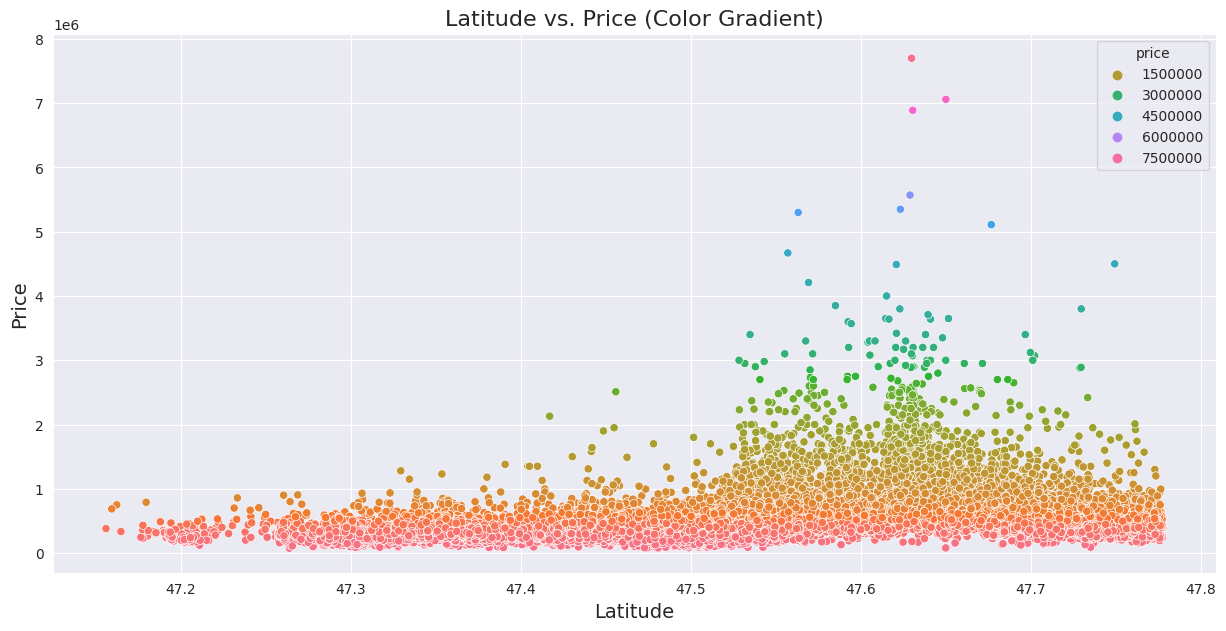

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='lat', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Latitude vs. Price (Color Gradient)', fontsize=16)
plt.show()

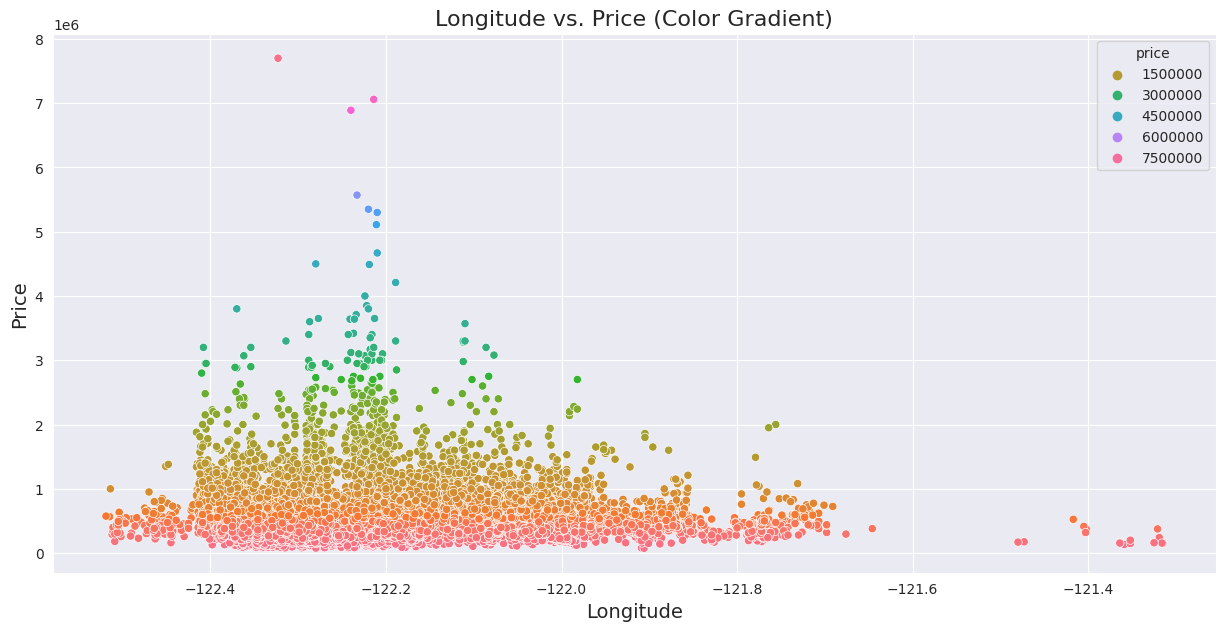

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='long', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Longitude vs. Price (Color Gradient)', fontsize=16)
plt.show()

Text(0, 0.5, 'price')

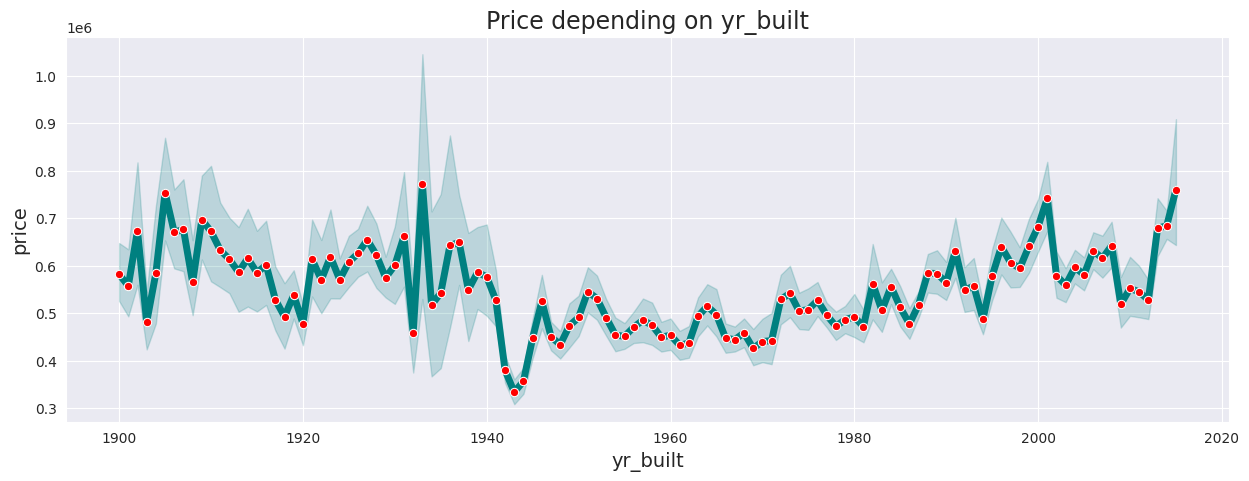

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='yr_built', y='price', data=df, color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_built', fontsize=17)
plt.xlabel('yr_built', fontsize=14)
plt.ylabel('price', fontsize=14)

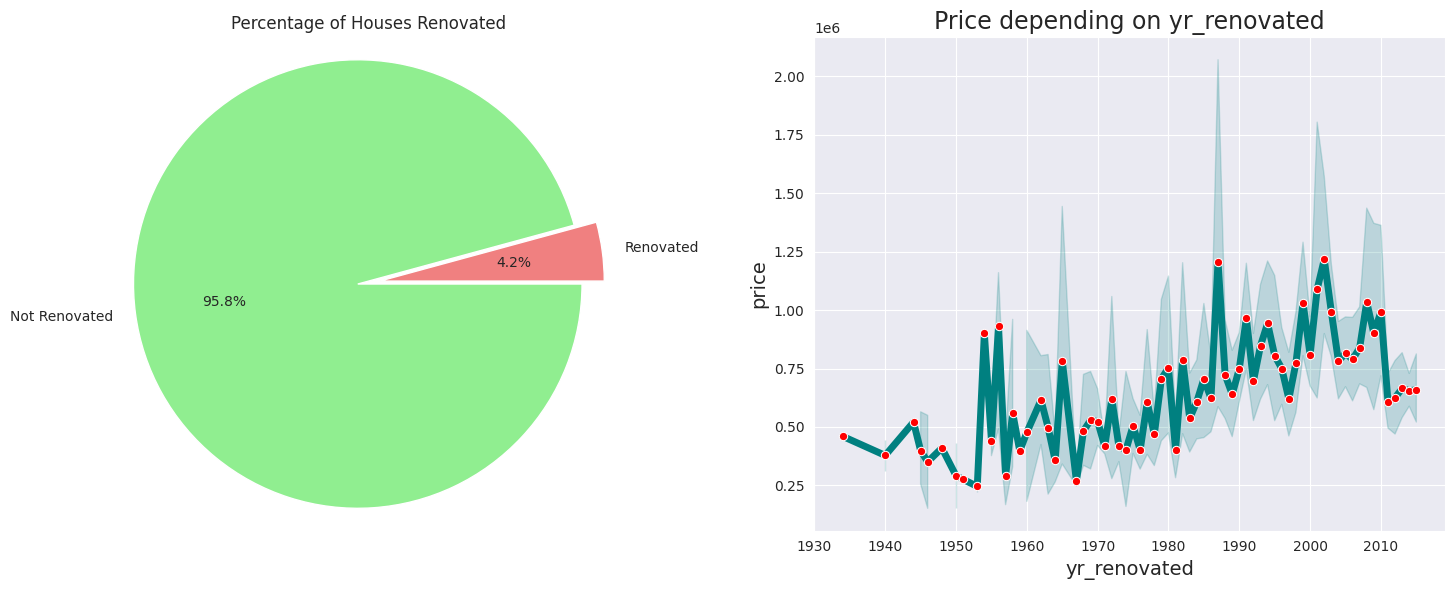

In [ ]:
renovated_count = len(df[df['yr_renovated'] != 0])

# Calculate the total number of houses.
total_houses = len(df)

# Calculate the percentage of houses that have been renovated.
percentage_renovated = (renovated_count / total_houses) * 100

# Create a pie chart.
labels = ['Renovated', 'Not Renovated']
sizes = [percentage_renovated, 100 - percentage_renovated]
explode = (0.1, 0)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, explode=explode, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Houses Renovated')
plt.axis('equal')

# Create the line plot showing the relationship between price and the year of renovation.
plt.subplot(1, 2, 2)
sns.lineplot(x='yr_renovated', y='price', data=df[df['yr_renovated'] != 0], color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_renovated', fontsize=17)
plt.xlabel('yr_renovated', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.tight_layout()

plt.show()